In [ ]:
# ! pip install pillow
# ! pip install keras
# ! pip install matplotlib

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow.keras.models import load_model

In [2]:
model = load_model('age_model.hdf5')
model.load_weights('sefik_age_model_weights.h5')

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)     

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def loadImage(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255
    return img


[[1.83709825e-10 1.48832413e-09 1.76497226e-04 2.74179572e-12
  2.97720671e-05 1.92733773e-04 4.26312863e-06 7.66592202e-05
  1.38826159e-04 1.36847069e-04 2.58328451e-04 4.75767185e-04
  7.08588224e-04 6.72978407e-04 1.53990579e-03 9.75572446e-04
  1.92315085e-03 1.92572700e-03 2.32519722e-03 4.53888159e-03
  7.65045825e-03 9.08645429e-03 1.10437386e-02 1.86089985e-02
  2.11231913e-02 2.56257169e-02 2.80463044e-02 3.43938731e-02
  3.41196284e-02 5.02460264e-02 5.50305471e-02 6.38280734e-02
  5.19042425e-02 5.77459149e-02 6.23491257e-02 5.46724126e-02
  5.86409941e-02 4.97686602e-02 4.79209982e-02 4.25723083e-02
  3.02456208e-02 3.05941515e-02 2.31990926e-02 2.28630845e-02
  1.81855652e-02 1.21805836e-02 1.35367485e-02 8.17868393e-03
  7.86057021e-03 5.49184531e-03 5.27907675e-03 3.23505490e-03
  3.22950794e-03 2.08648411e-03 1.54156738e-03 2.96483585e-03
  1.54146831e-03 6.93435722e-04 8.43961898e-04 1.31822075e-03
  5.84311085e-04 7.33543071e-04 6.07534952e-04 4.13304835e-04
  4.1853

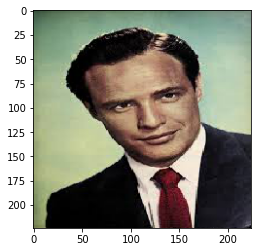

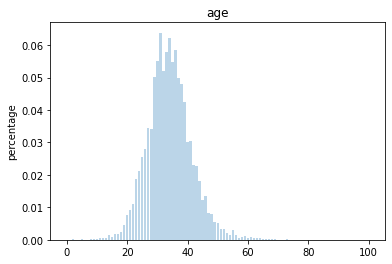

In [13]:
path = 'marlon.jpg'
pred = model.predict(loadImage(path))
print(pred)
plt.show()

y_pos = np.arange(101)
plt.bar(y_pos, pred[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

# Testing More - without graphs

most dominant age class (not apparent age):  31
apparent age:  33


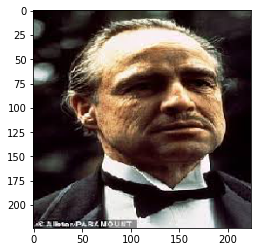

In [8]:
path = 'marlon_old.jpg'
pred = model.predict(loadImage(path))

output_indexes = np.array([i for i in range(0, 101)])
print("most dominant age class (not apparent age): ",np.argmax(pred))
 
apparent_age = np.round(np.sum(pred * output_indexes, axis = 1))
print("apparent age: ", int(apparent_age[0]))

most dominant age class (not apparent age):  31
apparent age:  32


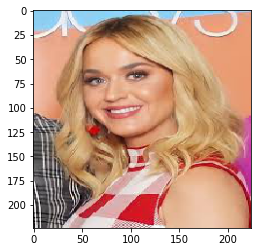

In [11]:
path = 'katy.jpg'
pred = model.predict(loadImage(path))

output_indexes = np.array([i for i in range(0, 101)])
print("most dominant age class (not apparent age): ",np.argmax(pred))
 
apparent_age = np.round(np.sum(pred * output_indexes, axis = 1))
print("apparent age: ", int(apparent_age[0]))